In [6]:
import math
import random as rndd
import math # cos() for Rastrigin
import copy # array-copying convenience
import sys	 # max float
import numpy as np
from numpy import random
import math # sin()

In [7]:
#-------fitness functions---------

# # rastrigin function
# def fitness_rastrigin(position):
#     fitness_value = 0.0
#     for i in range(len(position)):
#         xi = position[i]
#         fitness_value += (xi * xi) - (10 * math.cos(2 * math.pi * xi)) + 10
#     return fitness_value

# #sphere function
# def fitness_sphere(position):
# 	fitness_value = 0.0
# 	for i in range(len(position)):
# 		xi = position[i]
# 		fitness_value += (xi*xi)
# 	return fitness_value

# Ackley function
# def ackley_function(position):
#     sum_sq = sum(xi**2 for xi in position)
#     sum_cos = sum(math.cos(2 * math.pi * xi) for xi in position)
#     n = len(position)
    
#     return -20.0 * math.exp(-0.2 * math.sqrt(sum_sq / n)) - math.exp(sum_cos / n) + 20 + math.e

# Dixonnprice
# def dixon_price_function(position):
#     fitness_value = (position[0] - 1)**2

#     for i in range(1, len(position)):
#         xi = position[i]
#         fitness_value += (i + 1) * (2 * xi**2 - position[i - 1])**2

#     return fitness_value

# Levy function
# def levy_function(position):
#     x, y = position[0], position[1]
#     term1 = math.sin(3 * math.pi * x)**2
#     term2 = (x - 1)**2 * (1 + math.sin(3 * math.pi * y)**2)
#     term3 = (y - 1)**2 * (1 + math.sin(2 * math.pi * y)**2)
    
#     return term1 + term2 + term3



# def rotated_hyperellipsoid_function(position):
#     fitness_value = 0.0
    
#     for i in range(len(position)):
#         sum_sq = sum(position[j]**2 for j in range(i+1))
#         fitness_value += sum_sq
    
#     return fitness_value



# def rosenbrock_function(position):
#     fitness_value = 0.0
    
#     for i in range(len(position) - 1):
#         xi = position[i]
#         xiplus1 = position[i + 1]
#         fitness_value += 100 * (xiplus1 - xi**2)**2 + (1 - xi)**2
    
#     return fitness_value


# def zakharov_function(position):
#     sum_sq = sum(xi**2 for xi in position)
#     sum_cos = sum(0.5 * (i + 1) * xi for i, xi in enumerate(position))
    
#     fitness_value = sum_sq + sum_cos**2 + sum_cos**4
    
#     return fitness_value


# def beale_function(position):
#     x, y = position[0], position[1]
#     term1 = (1.5 - x + x * y)**2
#     term2 = (2.25 - x + x * y**2)**2
#     term3 = (2.625 - x + x * y**3)**2
    
#     return term1 + term2 + term3



# def holder_table_function(position):
#     x, y = position[0], position[1]
#     term1 = abs(math.sin(x) * math.cos(y) * math.exp(abs(1 - math.sqrt(x**2 + y**2)/math.pi)))
#     term2 = abs(y * math.sin(3*x) * math.cos(y**2) * math.exp(abs(1 - math.sqrt(x**2 + y**2)/math.pi)))
    
#     return -(term1 + term2)


# def goldstein_price_function(position):
#     x, y = position[0], position[1]
#     term1 = 1 + ((x + y + 1)**2) * (19 - 14 * x + 3 * x**2 - 14 * y + 6 * x * y + 3 * y**2)
#     term2 = 30 + ((2 * x - 3 * y)**2) * (18 - 32 * x + 12 * x**2 + 48 * y - 36 * x * y + 27 * y**2)
    
#     return term1 * term2

# def cross_in_tray_function(position):
#     x, y = position[0], position[1]
#     term1 = math.sin(x) * math.sin(y)
#     term2 = math.exp(abs(100 - math.sqrt(x**2 + y**2) / math.pi))
    
#     return -0.0001 * abs(term1 * term2) ** 0.1

# def quartic_function(position):
#     fitness_value = 0.0
#     for i in range(len(position)):
#         xi = position[i]
#         fitness_value += i * xi**4
    
#     return fitness_value



# def holder_table_function(position):
#     x, y = position[0], position[1]
#     fitness_value = -abs(math.sin(x) * math.cos(y) * math.exp(abs(1 - math.sqrt(x**2 + y**2)/math.pi)))
#     return fitness_value


In [8]:

# wolf class
class wolf:
    def __init__(self, fitness, dim, minx, maxx, seed):
        self.rnd = rndd.Random(seed)
        self.position = [0.0 for i in range(dim)]

        for i in range(dim):
            self.position[i] = ((maxx - minx) * self.rnd.random() + minx)

        self.fitness = fitness(self.position) # curr fitness



# grey wolf optimization (GWO)
def gwo(fitness, max_iter, n, dim, minx, maxx):
	rnd = rndd.Random(0)

	# create n random wolves
	population = [ wolf(fitness, dim, minx, maxx, i) for i in range(n)]

	# On the basis of fitness values of wolves
	# sort the population in asc order
	population = sorted(population, key = lambda temp: temp.fitness)

	# best 3 solutions will be called as
	# alpha, beta and gaama
	alpha_wolf, beta_wolf, gamma_wolf = copy.copy(population[: 3])


	# main loop of gwo
	Iter = 0
	Conver = np.zeros(max_iter)
	while Iter < max_iter:

		# after every 10 iterations
		# print iteration number and best fitness value so far
		#if Iter % 10 == 0 and Iter > 1:
			#print("Iter = " + str(Iter) + " best fitness = %.3f" % alpha_wolf.fitness)

		# linearly decreased from 2 to 0
		a = 2*(1 - Iter/max_iter)

		# updating each population member with the help of best three members
		for i in range(n):
			A1, A2, A3 = a * (2 * rnd.random() - 1), a * (
			2 * rnd.random() - 1), a * (2 * rnd.random() - 1)
			C1, C2, C3 = 2 * rnd.random(), 2*rnd.random(), 2*rnd.random()

			X1 = [0.0 for i in range(dim)]
			X2 = [0.0 for i in range(dim)]
			X3 = [0.0 for i in range(dim)]
			Xnew = [0.0 for i in range(dim)]
			for j in range(dim):
				X1[j] = alpha_wolf.position[j] - A1 * abs(
				C1 * alpha_wolf.position[j] - population[i].position[j])
				X2[j] = beta_wolf.position[j] - A2 * abs(
				C2 * beta_wolf.position[j] - population[i].position[j])
				X3[j] = gamma_wolf.position[j] - A3 * abs(
				C3 * gamma_wolf.position[j] - population[i].position[j])
				Xnew[j]+= X1[j] + X2[j] + X3[j]
			
			for j in range(dim):
				Xnew[j]/=3.0
			
			# fitness calculation of new solution
			fnew = fitness(Xnew)

			# greedy selection
			if fnew < population[i].fitness:
				population[i].position = Xnew
				population[i].fitness = fnew
				
		# On the basis of fitness values of wolves
		# sort the population in asc order
		population = sorted(population, key = lambda temp: temp.fitness)

		# best 3 solutions will be called as
		# alpha, beta and gaama
		alpha_wolf, beta_wolf, gamma_wolf = copy.copy(population[: 3])

		Conver[Iter] = alpha_wolf.fitness
		Iter+= 1
		
	# end-while

	# returning the best solution
	return alpha_wolf.position, Conver
		
#----------------------------



In [9]:

def Optimizer(Max_iter, SearchAgents_no, dim, lb, ub, objf, Elite_agents, Inferior_agents):
    

    # initialize of Elite, Inferior
    Global_pos = np.zeros((1,dim))
    Global_score = np.ones(1)*math.inf

    Elite_pos = np.zeros((Elite_agents ,dim))
    Elite_score = np.ones((Elite_agents ))*math.inf

    Inferior_pos = np.zeros((Inferior_agents,dim))
    Inferior_score = np.ones((Inferior_agents))*math.inf


    if not isinstance(lb, list):
        lb = [lb] * dim
    if not isinstance(ub, list):
        ub = [ub] * dim

    # Initialize the positions of search agents
    Positions = np.zeros((SearchAgents_no, dim))
    Sorted_Positions = np.zeros((SearchAgents_no, dim))
    Convergence_curve = np.zeros(Max_iter)
    Fitness = np.ones((15))*math.inf
    Sorted_Fitness = np.ones((15))*math.inf


    # initalization of search agents

    for i in range(0, SearchAgents_no):
        for j in range(dim):
            Positions[i, j] =(ub[j]-lb[j]) * rndd.random() + lb[j]

        # Calculate objective function for each search agent
        Fitness[i] = objf(Positions[i, :])


    #Sorting
    Sorted_Positions = sorted(Positions, key = objf)
    Sorted_Fitness = sorted(Fitness)

    # Grouping
    Global_score = Sorted_Fitness[0]
    Global_pos = Sorted_Positions[0].copy()

    for i in range(0, Elite_agents):
                Elite_score[i] = Sorted_Fitness[i] 
                Elite_pos[i] = Sorted_Positions[i].copy()
                
                
    for i in range(0, Inferior_agents):
        Inferior_score[i] = Sorted_Fitness[5+i]
        Inferior_pos[i] = Sorted_Positions[5+i].copy()

    for it in range (0, Max_iter):
    
        # Population Update
        a = 0.1*(1 - it/Max_iter)
            #Elite
        for i in range(0, Elite_agents):
            u = []
            #print("Iter: ",it, "Agents_no: ",i,"Prev: ", Elite_pos[i], "Score: ",Elite_score[i])
            for j in range(dim):
                c1 = 1.49
                c2 = 1.49
                w = 0.7 
                ra = rndd.random()
                rb = rndd.random()
                # Mean of the distribution
                Mean = Elite_pos[i,j]

                # satndard deviation of the distribution
                Standard_deviation = a

                # creating a normal distribution data
                values = np.random.normal(Mean, Standard_deviation, size = 1000)
                intt = rndd.randint(0,999)
                ui = values[intt]
                
                Elite_pos[i,j] =  (c1*ra*(Elite_pos[i,j] - ui)) + c2*rb*(Global_pos[j] - Elite_pos[i][j])
                
            Elite_score[i] = objf(Elite_pos[i, :])
            #print("Iter: ",it, "Agents_no: ",i,"New: ", Elite_pos[i], "Score: ",Elite_score[i])
                
             #Inferior
        for i in range(0, Inferior_agents):
                # Inferior position update
                
            for j in range(dim):

                Inferior_pos[i,j] = (rndd.random()* (ub[j] - lb[j])) + lb[j]

            Inferior_score[i] = objf(Inferior_pos[i, :])

        
        #Sorting
        Fitness =  np.concatenate((Elite_score, Inferior_score), axis = 0)
        Positions  =  np.concatenate((Elite_pos, Inferior_pos), axis = 0) 
        
        Sorted_Positions = sorted(Positions, key = objf)
        Sorted_Fitness = sorted(Fitness)
        
        if Sorted_Fitness[0] < Global_score :
            Global_score = Sorted_Fitness[0]
            Global_pos = Sorted_Positions[0].copy()
            #print("Global_Score", Global_score)

        for i in range(0, len(Elite_score)):
            Elite_score[i] = Sorted_Fitness[i] 
            Elite_pos[i] = Sorted_Positions[i].copy()
            

        for i in range(0, len(Inferior_score)):
            Inferior_score[i] = Sorted_Fitness[5+i]
            Inferior_pos[i] = Sorted_Positions[5+i].copy()

        """
        # Position Update after 5 iter of Elite
        for i in range(0, len(Elite_score)):
            
            for j in range(dim):
                c1 = 1.49445 # cognitive 
                c2= 1.49445 # social 
                r1 = rnd.random()    # randomizations
                r2 = rnd.random()
                # E position update toward global best
                Elite_pos[i,j] =(c1 * r1 * ( Global_pos[j] - Positions[i][j]) )
            Elite_score[i] = objf(Elite_pos[i, :])
        """


        Convergence_curve[it] = Global_score

        #if it % 1 == 0:
            #print(["At iteration " + str(it) + " the best fitness is " + str(Global_score)])
        
    return Global_score, Global_pos, Convergence_curve


In [10]:
# Driver code for rastrigin function


dim = 10
fitness = holder_table_function
print(f"holder_table_function, dim ={dim}")
num_particles = 15
max_iter = 500
lb = -10
ub = 10
Elite_agents = 7
Inferior_agents = num_particles - Elite_agents

best_position,Curve1_gwo = gwo(fitness, max_iter, num_particles, dim, -10, 10)
Score1, Pos1, Curve1_ss = Optimizer(max_iter, num_particles, dim, lb, ub, fitness, Elite_agents, Inferior_agents)

err = fitness(best_position)
print("fitness of GWO = %.6f" % err)
print("fitness of Seven_S = %.6f" % Score1)

print()
print()

# Driver code for Sphere function
# print("")
# dim = 10
# fitness = fitness_sphere
# print(f"Sphere function, dim ={dim}")
# num_particles = 15
# max_iter = 500

# best_position, Curve2_gwo = gwo(fitness, max_iter, num_particles, dim, -32.768,  32.768)
# Score2, Pos2, Curve2_ss = Optimizer(max_iter, num_particles, dim, lb, ub, fitness, Elite_agents, Inferior_agents)

# err = fitness(best_position)
# print("fitness of GWO = %.6f" % err)
# print("fitness of Seven_S = %.6f" % Score2)


holder_table_function, dim =10


OverflowError: math range error

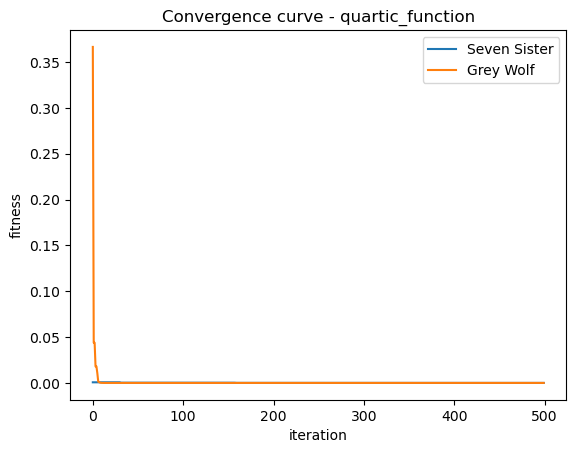

In [ ]:
# Convergence Curve
import matplotlib.pyplot as plt
            
plt.plot(range(0,max_iter),Curve1_ss, label = "Seven Sister")
plt.plot(range(0,max_iter),Curve1_gwo, label = "Grey Wolf")
plt.xlabel('iteration')
plt.ylabel('fitness')
plt.title('Convergence curve - quartic_function')
plt.legend()
plt.show()

In [ ]:
plt.plot(range(0,max_iter),Curve2_ss, label = "Seven Sister")
plt.plot(range(0,max_iter),Curve2_gwo, label = "Grey Wolf")
plt.xlabel('iteration')
plt.ylabel('fitness')
plt.title('Convergence curve - Sphere function')
plt.legend()
plt.show()

NameError: name 'Curve2_ss' is not defined

In [ ]:
import math
import numpy as np

functions = {
    "ackley": lambda x, y: -20.0 * math.exp(-0.2 * math.sqrt(0.5 * (x**2 + y**2))) - math.exp(0.5 * (math.cos(2 * math.pi * x) + math.cos(2 * math.pi * y))) + math.e + 20,

    "dixon_price": lambda x1, x2: (x1 - 1)**2 + 2 * (2 * x2**2 - x1)**2,

    "levy": lambda x, y: math.sin(3 * math.pi * x)**2 + (x - 1)**2 * (1 + math.sin(3 * math.pi * y)**2) + (y - 1)**2 * (1 + math.sin(2 * math.pi * y)**2),

    "rastrigin": lambda x, y: (x**2 - 10 * np.cos(2 * np.pi * x)) + (y**2 - 10 * np.cos(2 * np.pi * y)) + 20,

    "rotated_hyperellipsoid": lambda x1, x2: 2 * (x1**2) + x2**2,

    "rosenbrock": lambda x1, x2: 100 * (x2 - x1**2)**2 + (x1 - 1)**2,

    "sum_of_powers": lambda end, power=2, start=1: sum([(i)**power for i in range(start, end + 1)]),

    "zakharov": lambda x1, x2: (0.5 * x1 + x2)**2 + x1**2 + x2**2 + (0.5 * x1 + x2)**4,

    "quartic_noise": lambda x, y: sum([i * (x**4 + y**4) for i in range(3)]) + z,

    "generalized_pendilized": lambda x_0, s_0, x1, x2: compute_z(x_0, s_0, x1, x2),

    "beale": lambda position: (1.5 - position[0] + position[0] * position[1])**2 + (2.25 - position[0] + position[0] * position[1]**2)**2 + (2.625 - position[0] + position[0] * position[1]**3)**2,

    "goldstein_price": lambda x, y: (1 + ((x + y + 1)**2) * (19 - 14 * x + 3 * x**2 - 14 * y + 6 * x * y + 3 * y**2)) * (30 + ((2 * x - 3 * y)**2) * (18 - 32 * x + 12 * x**2 + 48 * y - 36 * x * y + 27 * y**2)),

    "cross_in_tray": lambda x, y: -0.0001 * abs(math.sin(x) * math.sin(y) * math.exp(abs(100 - math.sqrt(x**2 + y**2) / math.pi)))**0.1,

    "holder_table": lambda x, y: -(abs(math.sin(x) * math.cos(y) * math.exp(abs(1 - mathHere's the corrected code with the "himmelblau" function added to the dictionary:

```python
import math
import numpy as np

functions = {
    "ackley": lambda x, y: -20.0 * math.exp(-0.2 * math.sqrt(0.5 * (x**2 + y**2))) - math.exp(0.5 * (math.cos(2 * math.pi * x) + math.cos(2 * math.pi * y))) + math.e + 20,

    "dixon_price": lambda x1, x2: (x1 - 1)**2 + 2 * (2 * x2**2 - x1)**2,

    "levy": lambda x, y: math.sin(3 * math.pi * x)**2 + (x - 1)**2 * (1 + math.sin(3 * math.pi * y)**2) + (y - 1)**2 * (1 + math.sin(2 * math.pi * y)**2),

    "rastrigin": lambda x, y: (x**2 - 10 * np.cos(2 * np.pi * x)) + (y**2 - 10 * np.cos(2 * np.pi * y)) + 20,

    "rotated_hyperellipsoid": lambda x1, x2: 2 * (x1**2) + x2**2,

    "rosenbrock": lambda x1, x2: 100 * (x2 - x1**2)**2 + (x1 - 1)**2,

    "sum_of_powers": lambda end, power=2, start=1: sum([(i)**power for i in range(start, end + 1)]),

    "zakharov": lambda x1, x2: (0.5 * x1 + x2)**2 + x1**2 + x2**2 + (0.5 * x1 + x2)**4,

    "quartic_noise": lambda x, y: sum([i * (x**4 + y**4) for i in range(3)]) + z,

    "generalized_pendilized": lambda x_0, s_0, x1, x2: compute_z(x_0, s_0, x1, x2),

    "beale": lambda position: (1.5 - position[0] + position[0] * position[1])**2 + (2.25 - position[0] + position[0] * position[1]**2)**2 + (2.625 - position[0] + position[0] * position[1]**3)**2,

    "goldstein_price": lambda x, y: (1 + ((x + y + 1)**2) * (19 - 14 * x + 3 * x**2 - 14 * y + 6 * x * y + 3 * y**2)) * (30 + ((2 * x - 3 * y)**2) * (18 - 32 * x + 12 * x**2 + 48 * y - 36 * x * y + 27 * y**2)),

    "cross_in_tray": lambda x, y: -0.0001 * abs(math.sin(x) * math.sin(y) * math.exp(abs(100 - math.sqrt(x**2 + y**2) / math.pi)))**0.1,

    "holder_table": lambda x, y: -(abs(math.sin(x) * math.cos(y) * math.exp(abs(1 - math.sqrt(x**2 + y

```python
import math
import numpy as np

functions = {


SyntaxError: unterminated string literal (detected at line 31) (1820456784.py, line 31)